## CS153 Assignment 3: Advanced Image Composition

This notebook provides an overview of the functionality expected for Assignment 3 in CS153 Fall 2024.

### Setup

This next cell just sets up the import statements from your `A3.py` file which will contain all of your code for the assignment. Note that we also import plotting tools so we can show images in the notebook, as well as some functions for handling the input and output from our composition functions.

There are two libraries in particular that you may need to install for this assignment: [scipy](https://anaconda.org/anaconda/scipy) (for scipy.io) and [imutils](https://anaconda.org/conda-forge/imutils).

In [49]:
import A3 as A3
import matplotlib.pyplot as plt
from glob import glob
import os
import math as m
import numpy as np
from scipy.io import loadmat
import imutils as im

%matplotlib inline

plt.rcParams['figure.figsize'] = [12, 10]

### Question 1: Green Screen Extraction

This section will test your function for Question 1 on the assignment, namely:
- `green_extract`

In [50]:
imlist = [os.path.basename(x) for x in glob('imgs/test_imgs/*.png')]

for i, imname in enumerate(imlist):
    print(str(i) + ". " + imname)

0. calden_falling.png
1. ball_toss.png
2. ball3.png
3. head.png
4. francine_poppins.png
5. calden_umbrella.png
6. head_smiles.png


Let's show just a single element image that we've seen before. Note that our output is a list, so we still need to index into it to get the output image. Here I'm also using an alternative notation to multiply a single-channel mask with a multi-channel image. This is more efficient (but I also find it slightly less easy to follow when first introduced to these calculations, which is why I started the course explicitly converting to 3-channels).

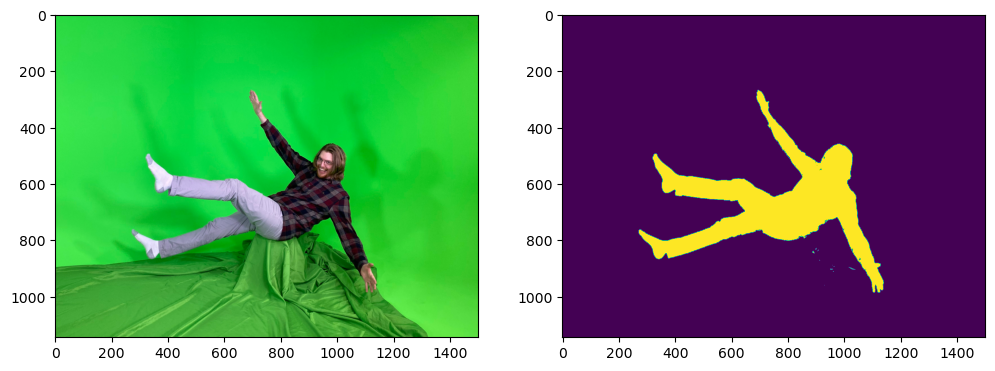

In [58]:
"""
    Works for: calden_falling.png
               
"""
import cv2
import numpy as np
import os

impath = 'imgs/test_imgs/calden_falling.png'
img = cv2.imread(impath)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
(h,w,c) = img.shape

gs_mask = np.zeros((h,w), dtype='uint8')

thresh = 17
fact = 1.5

gs_mask = img[:,:,1] < fact*img[:,:,0]
gs_mask = np.logical_or(gs_mask, img[:,:,1] < fact*img[:,:,2])
gs_mask = np.logical_or(gs_mask, img[:,:,1] < thresh)

plt.subplot(1,2,2)
plt.imshow(gs_mask)
plt.subplot(1,2,1)
plt.imshow(img)
plt.show()

In [59]:
gs_mask 

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

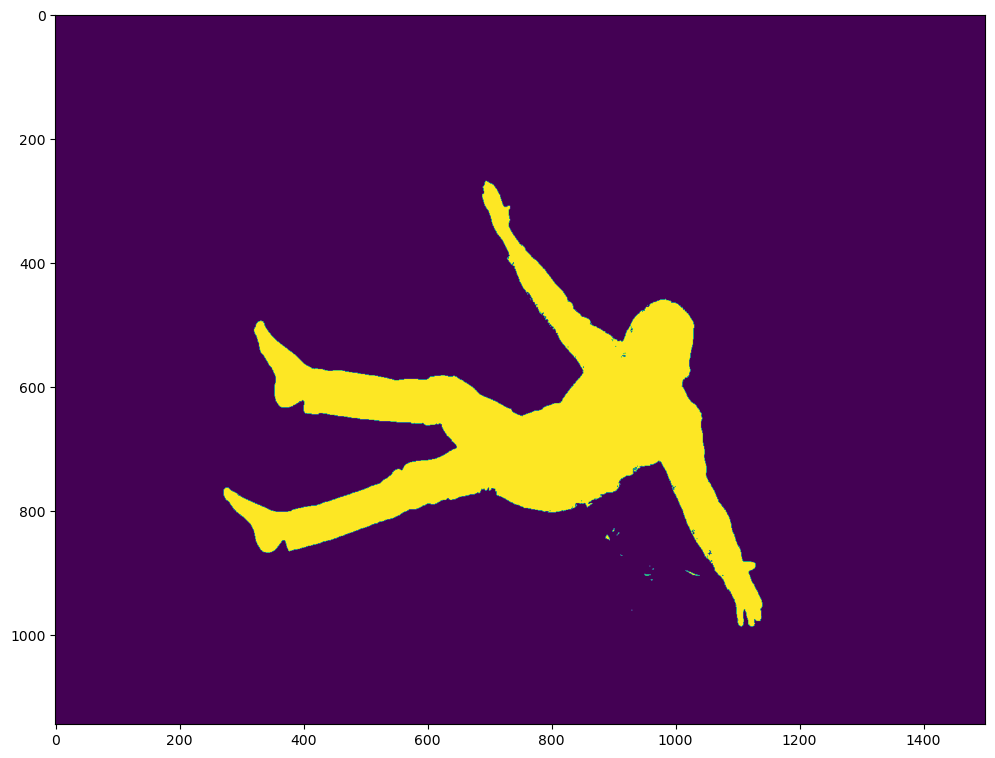

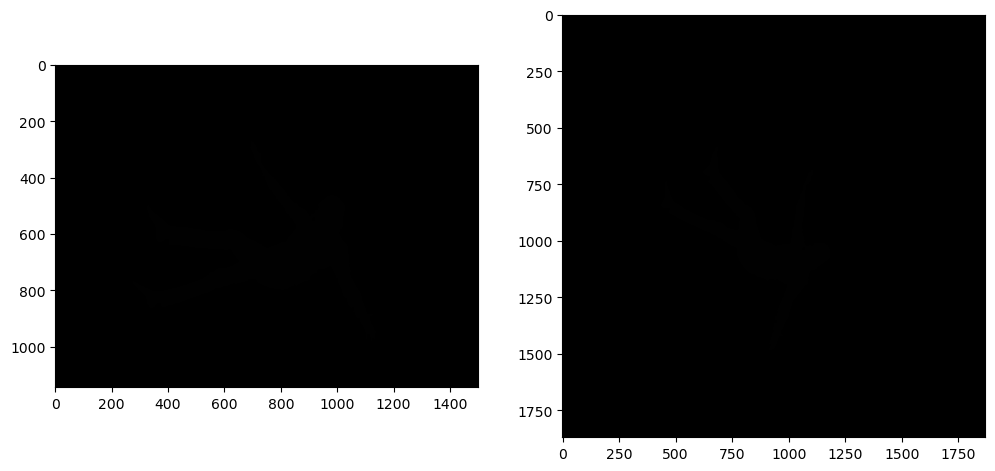

In [60]:
# Using imutils
plt.imshow(gs_mask)
plt.show()


gsmask = cv2.cvtColor(gs_mask.astype('uint8'), cv2.COLOR_GRAY2RGB)
rotated = im.rotate_bound(gsmask, 45)
plt.subplot(1,2,2)
plt.imshow(rotated)
plt.subplot(1,2,1)
plt.imshow(gsmask)
plt.show()

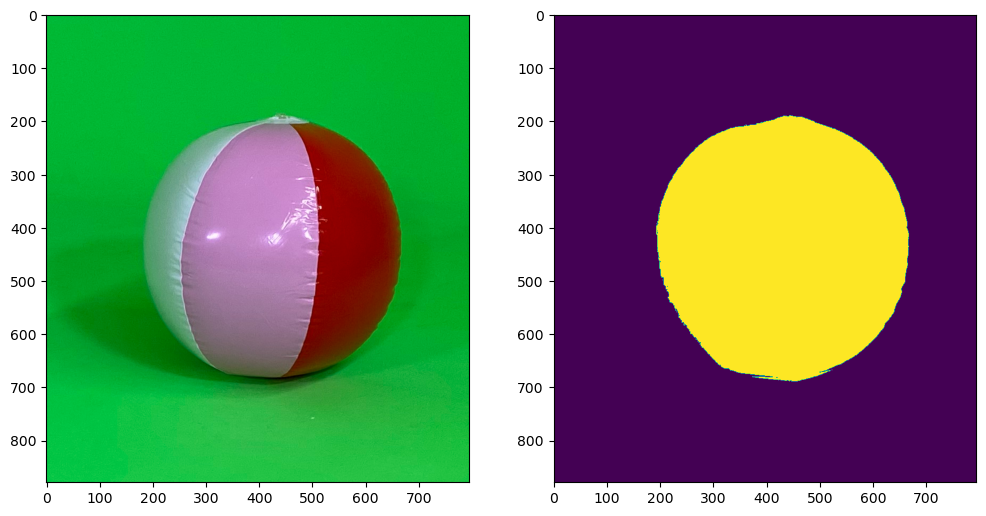

In [57]:
"""
    works for:    ball3.png
"""
import cv2
import numpy as np
import os

impath = 'imgs/test_imgs/ball3.png'
img = cv2.imread(impath)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
(h,w,c) = img.shape

gs_mask = np.zeros((h,w), dtype='uint8')

thresh = 50
fact = 1.5

gs_mask = img[:,:,1] < fact*img[:,:,0]
gs_mask = np.logical_or(gs_mask, img[:,:,1] < fact*img[:,:,2])
gs_mask = np.logical_or(gs_mask, img[:,:,1] < thresh)

plt.subplot(1,2,2)
plt.imshow(gs_mask)
plt.subplot(1,2,1)
plt.imshow(img)
plt.show()

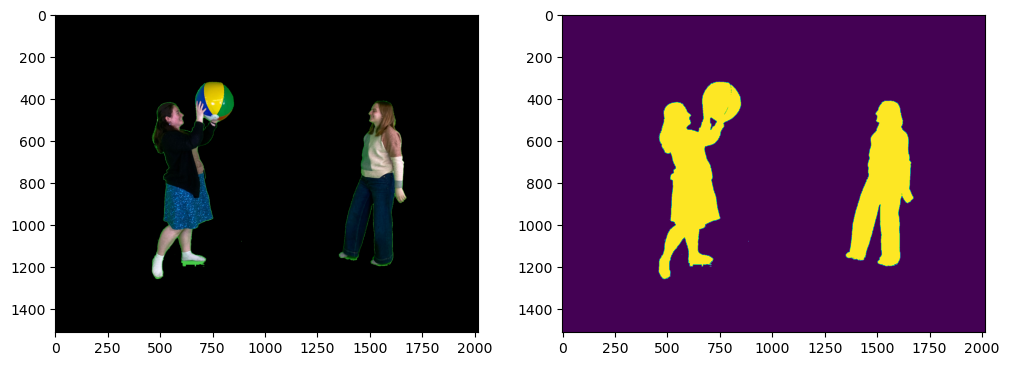

(1512, 2016)

In [63]:
"""
    WORKS PRETTY WELL NOW> 
    ball_toss.png:
        finds both objects:
            BUT doesn't recognize the green on the ball and right girl's sweater
               
"""
import cv2
import numpy as np
import os

impath = 'imgs/test_imgs/ball_toss.png'
img = cv2.imread(impath)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
(h,w,c) = img.shape

gs_mask = np.zeros((h,w), dtype=bool)

# thresh represents 
thresh = 50
fact = 1.5

gs_mask = img[:,:,1] < fact*img[:,:,0]
gs_mask = np.logical_or(gs_mask, img[:,:,1] < 100+fact*img[:,:,2])
# gs_mask = np.logical_or(gs_mask, img[:,:,1] < fact*img[:,:,0])
gs_mask = np.logical_or(gs_mask, img[:,:,1] < thresh)

elements= [img]
masks = [gs_mask]

plt.subplot(1,2,2)
plt.imshow(masks[0])
plt.subplot(1,2,1)
plt.imshow(elements[0]*masks[0][:,:,None])
plt.show()
# plt.subplot(1,2,2)
# plt.imshow(gs_mask)
# plt.subplot(1,2,1)
# plt.imshow(img)
# plt.show()

gs_mask.shape

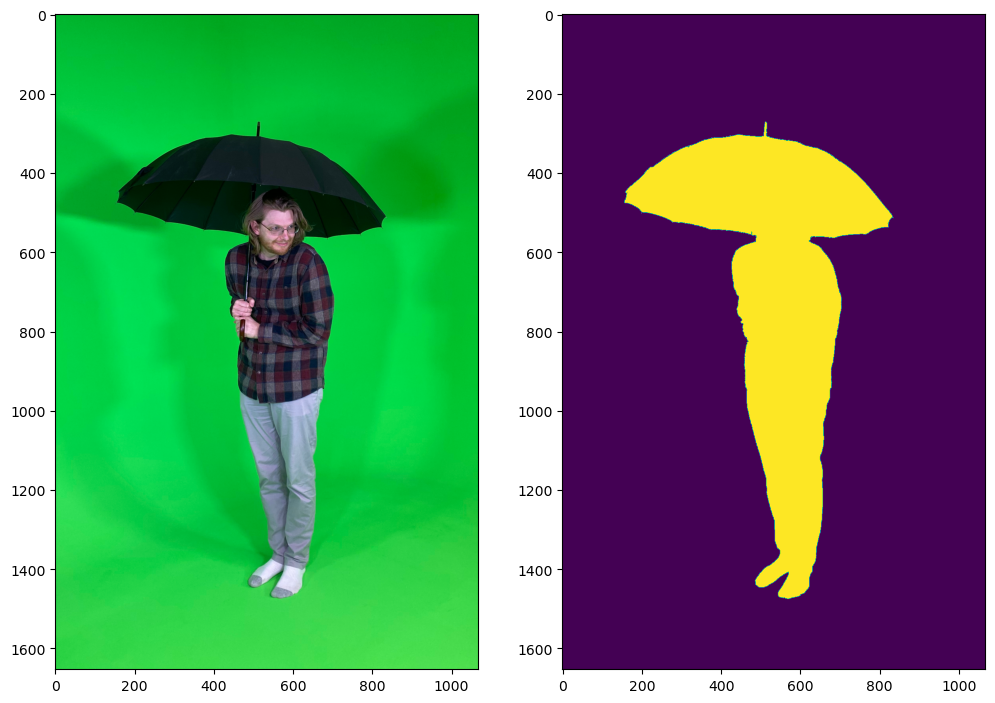

In [ ]:
"""
    calden_umbrella.png
    Default vals are okay but some of the lighter parts of the umbrella are getting treated as green.
    also the outline of calden's head is getting treated as green


"""
import cv2
import numpy as np
import os

impath = 'imgs/test_imgs/calden_umbrella.png'
img = cv2.imread(impath)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
(h,w,c) = img.shape

gs_mask = np.zeros((h,w), dtype=bool)

# thresh represents 
thresh = 60
fact = 1.6

gs_mask = img[:,:,1] < 30+fact*img[:,:,0]
gs_mask = np.logical_or(gs_mask, img[:,:,1] < 30+fact*img[:,:,2])
gs_mask = np.logical_or(gs_mask, img[:,:,1] < thresh)

plt.subplot(1,2,2)
plt.imshow(gs_mask)
plt.subplot(1,2,1)
plt.imshow(img)
plt.show()

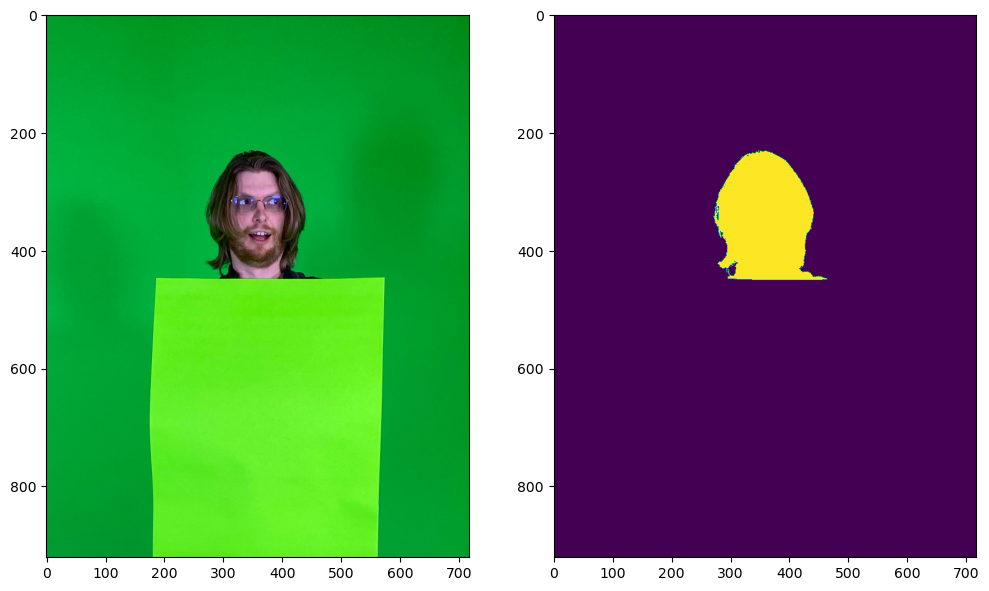

In [ ]:
"""
    head.png: increased red and blue by a constant
"""
import cv2
import numpy as np
import os

impath = 'imgs/test_imgs/head.png'
img = cv2.imread(impath)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
(h,w,c) = img.shape

gs_mask = np.zeros((h,w), dtype=bool)

# thresh represents 
thresh = 50
fact = 1.5

gs_mask = img[:,:,1] < 40+fact*img[:,:,0]
gs_mask = np.logical_or(gs_mask, img[:,:,1] < 40+fact*img[:,:,2])
gs_mask = np.logical_or(gs_mask, img[:,:,1] < thresh)

plt.subplot(1,2,2)
plt.imshow(gs_mask)
plt.subplot(1,2,1)
plt.imshow(img)
plt.show()

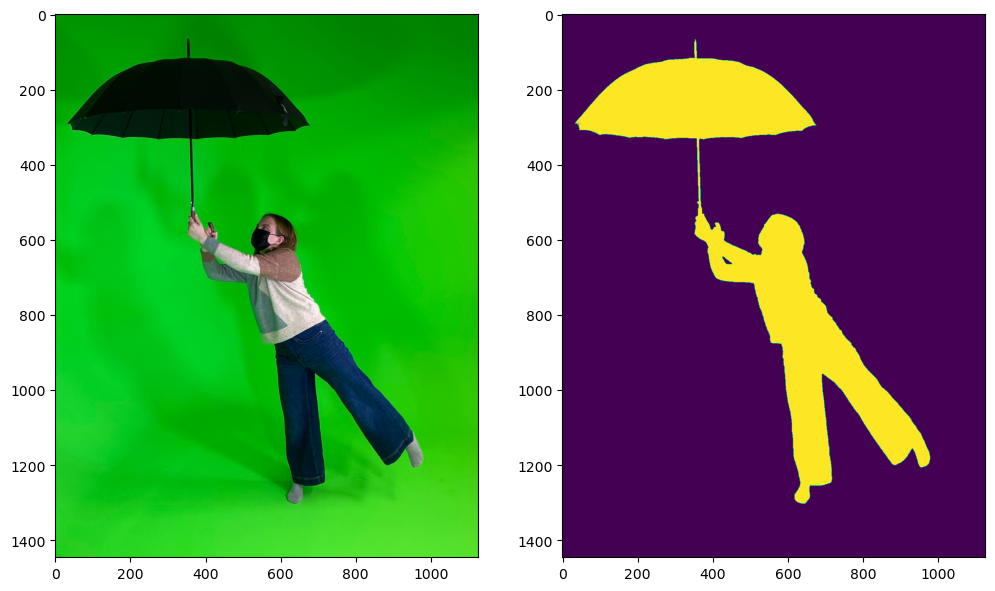

In [ ]:
"""
    francine_poppins.png
"""
import cv2
import numpy as np
import os

impath = 'imgs/test_imgs/francine_poppins.png'
img = cv2.imread(impath)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
(h,w,c) = img.shape

gs_mask = np.zeros((h,w), dtype=bool)

# thresh represents 
thresh = 50
fact = 1.5

gs_mask = img[:,:,1] < 40+fact*img[:,:,0]
gs_mask = np.logical_or(gs_mask, img[:,:,1] < 40+fact*img[:,:,2])
gs_mask = np.logical_or(gs_mask, img[:,:,1] < thresh)

plt.subplot(1,2,2)
plt.imshow(gs_mask)
plt.subplot(1,2,1)
plt.imshow(img)
plt.show()

In [ ]:
elements, masks = A3.green_extract('imgs/test_imgs/calden_falling.png')

plt.imshow(elements[0]*masks[0][:,:,None])
plt.axis('off')

NameError: name 'elements' is not defined

We can also show the output from a multi-object image.

In [ ]:
elements, masks = A3.green_extract('imgs/test_imgs/head_smiles.png')

print(len(elements))

fig, axes = plt.subplots(2,3, figsize=(16,12))

for jj, element in enumerate(elements):
    x = (jj%3)
    y = m.floor(jj/3)
    axes[y][x].imshow(element*masks[jj][:,:,None])
    axes[y][x].axis('off')
    
axes[1][2].axis('off')

NameError: name 'elements' is not defined

And here is an example of an image I did not do any fine-tuning of the output for to show an example of a poorly constructed mask.

In [ ]:
elements, masks = A3.green_extract('imgs/custom_imgs/crouch.jpg')

plt.imshow(elements[1]*masks[1][:,:,None])
plt.axis('off')

### Question 2: Advanced Insert

This section will test your functions for Question 2 on the assignment, namely:
- `affine_insert`

Note, it is demonstrated here using the output from Question 1, but you can modify this code to use transparent objects from Assignment 2 to test this part of the assignment without a functioning `green_extract` function.

First we will demonstrate inserting multiple objects to the same scene and taking advantage of the scene's depth map feature, all using `affine_insert`.

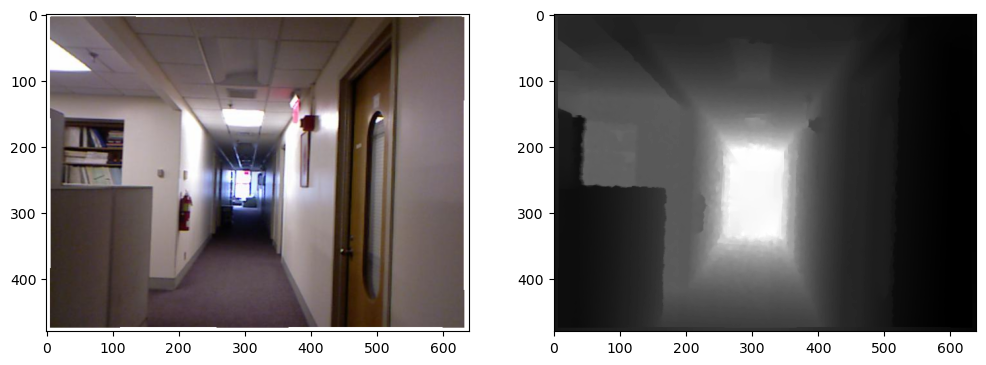

In [65]:
bgname = '_15'

d = loadmat('imgs/depth_maps/depth' + bgname + '.mat')
depth_map = d['dimg']
bckgrd = A3.load_img('imgs/backgrounds/image' + bgname + '.png')

plt.subplot(1,2,1)
plt.imshow(bckgrd)

plt.subplot(1,2,2)
plt.imshow(depth_map, cmap='gray')
plt.show()

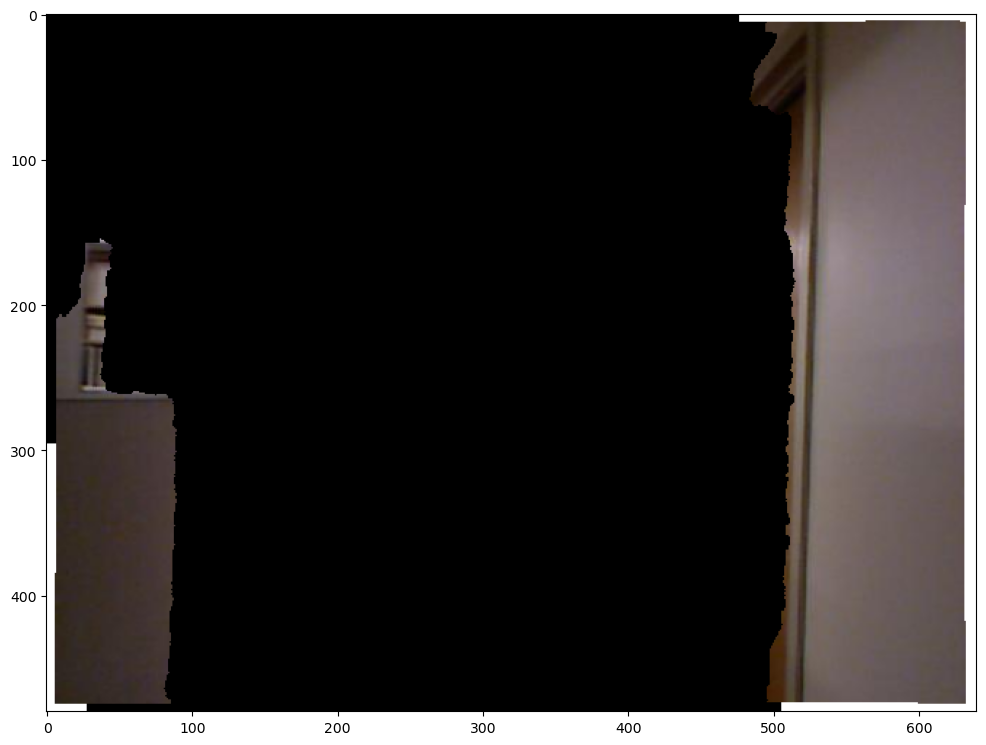

In [73]:
el_depth = 2.0
t = depth_map < el_depth

image = t[:,:,None] * bckgrd
plt.imshow(image)
plt.show()

We can explore the depth map to see what kind of values we should be dealing with. Let's print a few coordinates to try and gauge where to insert our objects.

In [ ]:
print(depth_map[300,125])
print(depth_map[400,200])
print(depth_map[400,300])
print(depth_map[300,300])


2.4119813
4.253077
5.0309396
9.672962


Now let's try inserting some objects.

In [ ]:
elements, masks = A3.green_extract('imgs/custom_imgs/megan_horflip.png')

megan = elements[0]
megan_mask = masks[0]

elements, masks = A3.green_extract('imgs/test_imgs/head.png')

head = elements[0]
head_mask = masks[0]

# affine_insert(scene, element, elmask, eldepth, location, height, angle = 0, scene_depth = None, alpha = 1)
scene, scene_depth = A3.affine_insert(bckgrd, megan, megan_mask, 3.0, [0.2,0.7], 0.7, 35, depth_map)

plt.subplot(1,2,1)
plt.imshow(scene)
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(scene_depth, cmap='gray')
plt.axis('off')

In [ ]:
scene2, scene_depth2 = A3.affine_insert(scene, head, head_mask, 2.9, [0.4,0.68], 0.16, -15, scene_depth)

plt.subplot(1,2,1)
plt.imshow(scene2)
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(scene_depth2, cmap='gray')
plt.axis('off')

### Question 3: Putting it all Together

Use your `custom_compose` function to build scenes, and feel free to share some on Slack! I will be periodically posting images throughout the next week.

Also, we should have time slots for you to go and take your own green screen images! Details to follow.